In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load figure style
plt.style.use('fig_style.txt')

In [2]:
pct_df = pd.read_csv('csv_results/mixture_profiles.csv', index_col=[0,1])
pct_df

p4        p5         p6         p7         p8        p9  \
end     sample                                                                  
OH      mean    0.263368  3.029235  36.898937  43.733341  14.094712  1.296028   
        rep1    0.251587  2.979228  36.366299  44.325032  13.870265  1.509781   
        rep2    0.251821  2.873950  35.269190  43.459023  15.720999  1.729855   
        rep3    0.286697  3.234526  39.061322  43.415968  12.692872  0.648448   
        std     0.020203  0.185416   1.951370   0.512872   1.526490  0.571514   
PPP     mean    0.047600  0.366913   3.152471  46.679295  41.586507  7.779855   
        rep1    0.038938  0.344089   3.037849  46.641690  41.775202  7.786260   
        rep2    0.054160  0.403518   3.438273  46.805748  41.190190  7.727563   
        rep3    0.049701  0.353132   2.981290  46.590446  41.794130  7.825740   
        std     0.007826  0.032022   0.249122   0.112469   0.343352  0.049401   
mixture mean    0.318222  2.571846  37.441155  42.513111  14.797994  1.948896   
        rep1    0.277853  2.453139  37.185241  42.677836  15.016152  1.977627   
        rep2    0.313381  2.655502  35.627318  42.484272  16.213136  2.272071   
        rep3    0.363431  2.606897  39.510905  42.377225  13.164695  1.596991   
        std     0.042994  0.105637   1.954400   0.152366   1.535885  0.338456   

                     p10  
end     sample            
OH      mean    0.684379  
        rep1    0.697808  
        rep2    0.695162  
        rep3    0.660167  
        std     0.021010  
PPP     mean    0.387359  
        rep1    0.375971  
        rep2    0.380547  
        rep3    0.405560  
        std     0.015927  
mixture mean    0.408776  
        rep1    0.412153  
        rep2    0.434319  
        rep3    0.379856  
        std     0.027388

In [3]:
coeff_df = pd.read_csv('csv_results/mixture_coefficients.csv', index_col=[0])
coeff_df

,-4,-3,-2,-1,0,1,2,3,4
rep1,0.000000e+00,0.000000,0.0,78.305001,21.338729,0.000000e+00,0.0,0.356270,0.000000e+00
rep2,0.000000e+00,0.000000,0.0,74.209520,25.424816,1.141728e-21,0.0,0.365664,3.634946e-23
rep3,5.205406e-22,0.123904,0.0,83.730058,15.807355,0.000000e+00,0.0,0.338682,0.000000e+00
mean,1.735135e-22,0.041301,0.0,78.748193,20.856967,3.805761e-22,0.0,0.353539,1.211649e-23
std,3.005343e-22,0.071536,0.0,4.775717,4.826796,6.591772e-22,0.0,0.013696,2.098637e-23


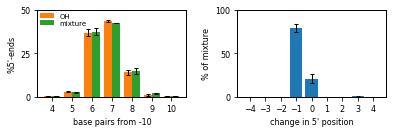

In [4]:
# Plot mean profile only
min_p5_pos = 4
max_p5_pos = 10
p5_pos = np.arange(min_p5_pos, max_p5_pos+1)
max_shift_left = 4
max_shift_right = 4
shifts = np.array(range(-max_shift_left, max_shift_right+1))
M = pct_df.shape[1]
N = coeff_df.shape[1]
width = 0.4

errorbar_kwargs = {'capsize':2,
                   'color':'k',
                   'elinewidth':1,
                   'capthick':1,
                   'linewidth':0}

# Plot mixture coefficients    
fig, axs = plt.subplots(1,2,figsize=[5.5,1.9])

# Extract values to plot
ppp_hist = pct_df.loc[('PPP','mean'),:]
oh_hist = pct_df.loc[('OH','mean'),:]
mix_hist = pct_df.loc[('mixture','mean'),:]
mix_coeffs = coeff_df.loc['mean',:]

ppp_dhist = pct_df.loc[('PPP','std'),:]
oh_dhist = pct_df.loc[('OH','std'),:]
mix_dhist = pct_df.loc[('mixture','std'),:]
mix_dcoeffs = coeff_df.loc['std',:]

# Plot percentages vs. 5' positions
ax = axs[0]
left_pos = p5_pos-width/2
right_pos = p5_pos+width/2
ax.bar(left_pos, oh_hist, width, label='OH', color='C1')
ax.bar(right_pos, mix_hist, width, label='mixture', color='C2')
ax.errorbar(x=left_pos, y=oh_hist, yerr=oh_dhist, 
            **errorbar_kwargs)
ax.errorbar(x=right_pos, y=mix_hist, yerr=mix_dhist, 
            **errorbar_kwargs)
ax.set_xticks(p5_pos)
ax.set_ylim([0,50])
ax.set_yticks([0, 25, 50])
ax.set_xlabel('base pairs from -10')
ax.set_ylabel(f'%5\'-ends')
ax.legend(loc='upper left', framealpha=0)

# Plot mixture coefficients
ax = axs[1]
ax.bar(shifts, mix_coeffs, .8)
ax.errorbar(x=shifts, y=mix_coeffs, yerr=mix_dcoeffs, 
                **errorbar_kwargs)
ax.set_xlabel('change in 5\' position')
ax.set_ylabel(f'% of mixture')
ax.set_xticks(shifts)
ax.set_ylim([0, 100])
ax.set_yticks([0, 50, 100])

fig.tight_layout(w_pad=2, h_pad=2)
fig.savefig(f'figures/fig_S1A_mixture.pdf')